# Fashion Image Classification

We are now using neural network we built in python (import from NN2) to classify fashion images, which are known as Fashion MNIST.

Data source: https://www.kaggle.com/zalando-research/fashionmnist

### Download the data

In [ ]:
import sys
sys.path.insert(0, '../src')

from NN2 import *
from tensorflow.keras import datasets # High order layers, models, etc
import numpy as np
from matplotlib import pyplot as plt
from tabulate import tabulate

In [2]:
seed=1
np.random.seed(seed)

In [3]:
fashion_mnist = datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape, test_images.shape, type(train_images), train_labels.shape

((60000, 28, 28), (10000, 28, 28), numpy.ndarray, (60000,))

#### visualise the data

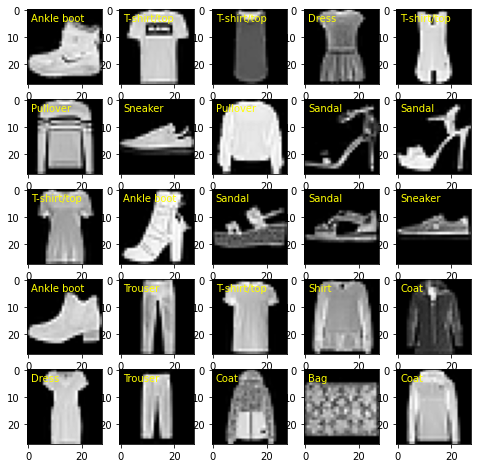

In [5]:
fig, axs = plt.subplots(5,5,figsize=(8,8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(train_images[i,:,:],cmap='gray', vmin=0, vmax=255)
    ax.text(1,1,class_names[train_labels[i]],color='yellow',va='top', ha='left')



#### Transform the data for NN. 
* Flatten images and divide greyscale by 255.
* One-hot encode y data (I'm doing this with numpy rather than an imported library, so its a couple more lines of code).

In [6]:
train_N = train_labels.size
test_N = test_labels.size
X_train = train_images.reshape(-1, 28*28) / 255
X_test = test_images.reshape(-1, 28*28) / 255
y_train = np.zeros((train_N, 10))
y_train[np.arange(train_N), train_labels] = 1
y_test = np.zeros((test_N, 10))
y_test[np.arange(test_N), test_labels] = 1

#### Check if data are balanced

In [7]:
print('For training data')
for i in range(10):
    print('no of samples in class '+str(i)+': '+str(np.sum(y_train[np.arange(train_N), i])))
print('For testing data')
for i in range(10):
    print('no of samples in class '+str(i)+': '+str(np.sum(y_test[np.arange(test_N), i])))

For training data
no of samples in class 0: 6000.0
no of samples in class 1: 6000.0
no of samples in class 2: 6000.0
no of samples in class 3: 6000.0
no of samples in class 4: 6000.0
no of samples in class 5: 6000.0
no of samples in class 6: 6000.0
no of samples in class 7: 6000.0
no of samples in class 8: 6000.0
no of samples in class 9: 6000.0
For testing data
no of samples in class 0: 1000.0
no of samples in class 1: 1000.0
no of samples in class 2: 1000.0
no of samples in class 3: 1000.0
no of samples in class 4: 1000.0
no of samples in class 5: 1000.0
no of samples in class 6: 1000.0
no of samples in class 7: 1000.0
no of samples in class 8: 1000.0
no of samples in class 9: 1000.0


As data are balanced, we may simply use test accuracy as the major metric to evaluate the performance of classification.

### Run the NN to see if it works

In [8]:
model = NN(learning_rate=0.25, regularization=None, reg_alpha=None, random_seed=2)
model.add(1024, NN.ReLu)
model.add(10, NN.softmax)
model.model(X_train, y_train, X_test, y_test, minibatch_size=32, verbose=True)

number of samples = 60000
training data has 784 features
learning rate = 0.25
regularization is None with parameter None
minibatch size is 32

hidden layer 0:
nodes in previous layer: 784
nodes in this layer: 1024
weight shape: (784, 1024)
bias shape: (1, 1024)
activation function is <function NN.ReLu at 0x1344ea0d0>

hidden layer 1:
nodes in previous layer: 1024
nodes in this layer: 10
weight shape: (1024, 10)
bias shape: (1, 10)
activation function is <function NN.softmax at 0x1344ea1f0>


In [9]:
%%time
model.fit(epochs=15, min_epochs=2, patience=2, stopping_metric="valid", verbose=True)

epoch 0 average loss: 0.515; train accy: 0.856; test accy: 0.842; test loss: 0.431
epoch 1 average loss: 0.382; train accy: 0.861; test accy: 0.844; test loss: 0.433
epoch 2 average loss: 0.346; train accy: 0.883; test accy: 0.861; test loss: 0.386
epoch 3 average loss: 0.323; train accy: 0.900; test accy: 0.876; test loss: 0.344
epoch 4 average loss: 0.300; train accy: 0.887; test accy: 0.858; test loss: 0.392
average loss improvement is small: early stop
CPU times: user 6min 46s, sys: 58.2 s, total: 7min 44s
Wall time: 1min 6s


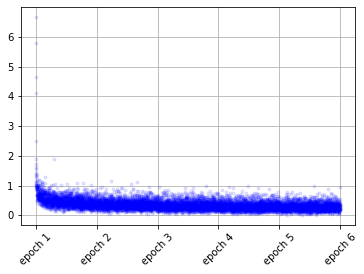

In [8]:
model.plot_error()

#### Let's try regularization L2 and stopping criteria

In [9]:
model = NN(learning_rate=0.25, regularization="L2", reg_alpha=0.01)
model.add(1024, NN.ReLu)
model.add(10, NN.softmax)
model.model(X_train, y_train, X_test, y_test, minibatch_size=32, verbose=True)

number of samples = 60000
training data has 784 features
learning rate = 0.25
regularization is L2 with parameter 0.01
minibatch size is 32

hidden layer 0:
nodes in previous layer: 784
nodes in this layer: 1024
weight shape: (784, 1024)
bias shape: (1, 1024)
activation function is <function NN.ReLu at 0x132126e50>

hidden layer 1:
nodes in previous layer: 1024
nodes in this layer: 10
weight shape: (1024, 10)
bias shape: (1, 10)
activation function is <function NN.softmax at 0x132126f70>


In [10]:
%%time
model.fit(epochs=15, min_epochs=2, patience=5, stopping_metric="valid", verbose=True)

epoch 0 average loss: 0.654; train accy: 0.808; test accy: 0.793; test loss: 0.571
epoch 1 average loss: 0.604; train accy: 0.755; test accy: 0.746; test loss: 0.697
epoch 2 average loss: 0.603; train accy: 0.773; test accy: 0.764; test loss: 0.647
epoch 3 average loss: 0.596; train accy: 0.803; test accy: 0.788; test loss: 0.577
epoch 4 average loss: 0.597; train accy: 0.794; test accy: 0.783; test loss: 0.591
epoch 5 average loss: 0.590; train accy: 0.808; test accy: 0.796; test loss: 0.581
average loss improvement is small: early stop
CPU times: user 9min 15s, sys: 1min 25s, total: 10min 40s
Wall time: 5min


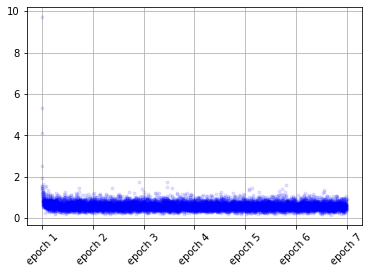

In [11]:
model.plot_error()

#### Try different batch size 64

In [12]:
model = NN(learning_rate=0.25, regularization=None, reg_alpha=None)
model.add(1024, NN.ReLu)
model.add(10, NN.softmax)
model.model(X_train, y_train, X_test, y_test, minibatch_size=64, verbose=True)

number of samples = 60000
training data has 784 features
learning rate = 0.25
regularization is None with parameter None
minibatch size is 64

hidden layer 0:
nodes in previous layer: 784
nodes in this layer: 1024
weight shape: (784, 1024)
bias shape: (1, 1024)
activation function is <function NN.ReLu at 0x132126e50>

hidden layer 1:
nodes in previous layer: 1024
nodes in this layer: 10
weight shape: (1024, 10)
bias shape: (1, 10)
activation function is <function NN.softmax at 0x132126f70>


In [13]:
model.fit(epochs=15)

epoch 0 average loss: 0.540; train accy: 0.858; test accy: 0.846; test loss: 0.440
epoch 1 average loss: 0.382; train accy: 0.867; test accy: 0.851; test loss: 0.416
epoch 2 average loss: 0.343; train accy: 0.887; test accy: 0.868; test loss: 0.372
epoch 3 average loss: 0.318; train accy: 0.887; test accy: 0.862; test loss: 0.373
epoch 4 average loss: 0.298; train accy: 0.874; test accy: 0.854; test loss: 0.441
average loss improvement is small: early stop


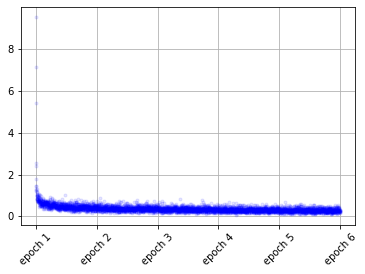

In [14]:
model.plot_error()

#### Try regularization L1

In [15]:
model = NN(learning_rate=0.25, regularization="L1", reg_alpha=0.01)
model.add(1024, NN.ReLu)
model.add(10, NN.softmax)
model.model(X_train, y_train, X_test, y_test, minibatch_size=64, verbose=True)

number of samples = 60000
training data has 784 features
learning rate = 0.25
regularization is L1 with parameter 0.01
minibatch size is 64

hidden layer 0:
nodes in previous layer: 784
nodes in this layer: 1024
weight shape: (784, 1024)
bias shape: (1, 1024)
activation function is <function NN.ReLu at 0x132126e50>

hidden layer 1:
nodes in previous layer: 1024
nodes in this layer: 10
weight shape: (1024, 10)
bias shape: (1, 10)
activation function is <function NN.softmax at 0x132126f70>


In [16]:
model.fit(epochs=5)

epoch 0 average loss: 1.492; train accy: 0.436; test accy: 0.440; test loss: 1.558
epoch 1 average loss: 1.393; train accy: 0.336; test accy: 0.336; test loss: 1.585
epoch 2 average loss: 1.365; train accy: 0.470; test accy: 0.471; test loss: 1.431
epoch 3 average loss: 1.354; train accy: 0.304; test accy: 0.305; test loss: 2.099
epoch 4 average loss: 1.292; train accy: 0.489; test accy: 0.491; test loss: 1.213


#### Try learning rate 0.1

In [17]:
model = NN(learning_rate=0.1)
model.add(1024, NN.ReLu)
model.add(10, NN.softmax)
model.model(X_train, y_train, X_test, y_test, minibatch_size=64, verbose=True)

number of samples = 60000
training data has 784 features
learning rate = 0.1
regularization is None with parameter None
minibatch size is 64

hidden layer 0:
nodes in previous layer: 784
nodes in this layer: 1024
weight shape: (784, 1024)
bias shape: (1, 1024)
activation function is <function NN.ReLu at 0x132126e50>

hidden layer 1:
nodes in previous layer: 1024
nodes in this layer: 10
weight shape: (1024, 10)
bias shape: (1, 10)
activation function is <function NN.softmax at 0x132126f70>


In [18]:
model.fit(epochs=15)

epoch 0 average loss: 0.536; train accy: 0.850; test accy: 0.836; test loss: 0.452
epoch 1 average loss: 0.396; train accy: 0.860; test accy: 0.844; test loss: 0.436
epoch 2 average loss: 0.356; train accy: 0.880; test accy: 0.863; test loss: 0.384
epoch 3 average loss: 0.332; train accy: 0.888; test accy: 0.867; test loss: 0.370
epoch 4 average loss: 0.314; train accy: 0.881; test accy: 0.858; test loss: 0.394
average loss improvement is small: early stop


#### Try learning rate 0.5

In [19]:
model = NN(learning_rate=0.5)
model.add(1024, NN.ReLu)
model.add(10, NN.softmax)
model.model(X_train, y_train, X_test, y_test, minibatch_size=64, verbose=True)
print("\n\n")
model.fit(epochs=15)

number of samples = 60000
training data has 784 features
learning rate = 0.5
regularization is None with parameter None
minibatch size is 64

hidden layer 0:
nodes in previous layer: 784
nodes in this layer: 1024
weight shape: (784, 1024)
bias shape: (1, 1024)
activation function is <function NN.ReLu at 0x132126e50>

hidden layer 1:
nodes in previous layer: 1024
nodes in this layer: 10
weight shape: (1024, 10)
bias shape: (1, 10)
activation function is <function NN.softmax at 0x132126f70>



epoch 0 average loss: 0.649; train accy: 0.847; test accy: 0.832; test loss: 0.470
epoch 1 average loss: 0.418; train accy: 0.847; test accy: 0.831; test loss: 0.487
epoch 2 average loss: 0.369; train accy: 0.861; test accy: 0.843; test loss: 0.466
epoch 3 average loss: 0.341; train accy: 0.877; test accy: 0.854; test loss: 0.400
epoch 4 average loss: 0.323; train accy: 0.842; test accy: 0.820; test loss: 0.553
average loss improvement is small: early stop


#### Try Sigmoid activation function

In [13]:
model = NN(learning_rate=0.25)
model.add(356, NN.sigmoid)
model.add(10, NN.softmax)
model.model(X_train, y_train, X_test, y_test, verbose=True)

number of samples = 60000
training data has 784 features
learning rate = 0.25
regularization is None with parameter None

hidden layer 0:
nodes in previous layer: 784
nodes in this layer: 356
weight shape: (784, 356)
bias shape: (1, 356)
activation function is <function NN.sigmoid at 0x1344ea160>

hidden layer 1:
nodes in previous layer: 356
nodes in this layer: 10
weight shape: (356, 10)
bias shape: (1, 10)
activation function is <function NN.softmax at 0x1344ea1f0>


In [14]:
model.fit(epochs=10)

epoch 0 average loss: 2.542; train accy: 0.085; test accy: 0.092; test loss: 2.686
epoch 1 average loss: 2.686; train accy: 0.086; test accy: 0.084; test loss: 2.432
epoch 2 average loss: 2.433; train accy: 0.144; test accy: 0.146; test loss: 2.552


/Users/suenchihang/Documents/CityU/INM702-Maths/Coursework/AI_INM702_collab/task3/nb/../src/NN2.py:459: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


epoch 3 average loss: 2.553; train accy: 0.100; test accy: 0.100; test loss: 2.355
epoch 4 average loss: 2.355; train accy: 0.249; test accy: 0.252; test loss: 2.405
average loss improvement is small: early stop


## Tuning parameters systematically

#### Number of layers
First, we need to decide the basic structure for tuning, i.e. number of layers. Then we build helper function based on the determined basic structure. Let's try different number of layers.

In [34]:
model = NN(learning_rate=0.25)
model.add(1024, NN.ReLu)
model.add(10, NN.softmax)
model.model(X_train, y_train, X_test, y_test, minibatch_size=32, verbose=False)
model.fit(epochs=15)

epoch 0 average loss: 0.516; train accy: 0.860; test accy: 0.843; test loss: 0.432
epoch 1 average loss: 0.382; train accy: 0.873; test accy: 0.857; test loss: 0.397
epoch 2 average loss: 0.343; train accy: 0.890; test accy: 0.868; test loss: 0.373
epoch 3 average loss: 0.321; train accy: 0.897; test accy: 0.871; test loss: 0.358
epoch 4 average loss: 0.300; train accy: 0.879; test accy: 0.854; test loss: 0.423
average loss improvement is small: early stop


In [32]:
model = NN(learning_rate=0.25)
model.add(1024, NN.ReLu)
model.add(1024, NN.ReLu)
model.add(10, NN.softmax)
model.model(X_train, y_train, X_test, y_test, minibatch_size=32, verbose=False)
model.fit(epochs=15)

epoch 0 average loss: 0.567; train accy: 0.864; test accy: 0.850; test loss: 0.418
epoch 1 average loss: 0.379; train accy: 0.879; test accy: 0.862; test loss: 0.381
epoch 2 average loss: 0.339; train accy: 0.886; test accy: 0.866; test loss: 0.375
epoch 3 average loss: 0.312; train accy: 0.881; test accy: 0.861; test loss: 0.408
epoch 4 average loss: 0.293; train accy: 0.899; test accy: 0.874; test loss: 0.342
epoch 5 average loss: 0.277; train accy: 0.904; test accy: 0.874; test loss: 0.342
average loss improvement is small: early stop


In [33]:
model = NN(learning_rate=0.25)
model.add(1024, NN.ReLu)
model.add(1024, NN.ReLu)
model.add(1024, NN.ReLu)
model.add(10, NN.softmax)
model.model(X_train, y_train, X_test, y_test, minibatch_size=32, verbose=False)
model.fit(epochs=15)

epoch 0 average loss: 0.601; train accy: 0.858; test accy: 0.847; test loss: 0.426
epoch 1 average loss: 0.396; train accy: 0.861; test accy: 0.846; test loss: 0.424
epoch 2 average loss: 0.353; train accy: 0.867; test accy: 0.847; test loss: 0.423
epoch 3 average loss: 0.323; train accy: 0.879; test accy: 0.857; test loss: 0.410
epoch 4 average loss: 0.305; train accy: 0.896; test accy: 0.870; test loss: 0.350
epoch 5 average loss: 0.289; train accy: 0.881; test accy: 0.859; test loss: 0.403
average loss improvement is small: early stop


Using test accuracy at the last epoch for evaluation, we can decide the basic structure - 3 layers. And from earlier trials, sigmoid looks terrible, so we can simply choose ReLu as activation function.

Then, we build helper functions to create models of the same basic structure easily.

In [15]:
def NNs(lr=0.25,L=None,alpha=None,seed=42,n1=1024,n2=1024, batch_size=32, epochs=15, min_epochs=2, patience=5, v_fit=False):
    model = NN(learning_rate=lr, regularization=L, reg_alpha=alpha, random_seed=seed)
    model.add(n1, NN.ReLu)
    model.add(n2, NN.ReLu)
    model.add(10, NN.softmax)
    model.model(X_train, y_train, X_test, y_test, minibatch_size=batch_size, verbose=False)
    model.fit(epochs=epochs , min_epochs=min_epochs, patience=patience, stopping_metric="valid", verbose=v_fit)
    return model

In [25]:
model.accuracy(model.predict(X_test),y_test)

0.1391

### Tuning number of nodes

Let's tune the number of nodes in the first layer, n1, and numner of nodes in the second layer, n2.

In [37]:
#create and fit models for diff no of nodes, then store accuracy
Nodes={}
accuracy={}
for i in [256,512,1024,2048,4096]:
    Nodes[i]={}
    accuracy[i]={}
    for j in [256,512,1024,2048,4096]:
        Nodes[i][j]=NNs(n1=i,n2=j)
        accuracy[i][j]=Nodes[i][j].accuracy(Nodes[i][j].predict(X_test),y_test)

average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop


KeyboardInterrupt: 

As the program runs too long for 2048 x 2048 structure, we stop the looping and see if we can be satisfied with the result.

We build helper function to print result in table form.

In [44]:
#Print in tabular format for accuracy in testing data
rows=[]
count=0
for n1 in [256,512,1024,2048]:
    rows.append(['n1='+str(n1)])
    for n2 in [256,512,1024,2048,4096]:
        if n1 == 2048 and n2 == 2048:
            break
        rows[count].append("{:.2f}".format(accuracy[n1][n2]*100)+'%')
    count += 1
        
print('NN variant accuracy in testing data')
from tabulate import tabulate
print(tabulate(rows, headers=['Accuracy', 'n2=256', 'n2=512','n2=1024','n2=2048','n2=4096']))


NN variant accuracy in testing data
Accuracy    n2=256    n2=512    n2=1024    n2=2048    n2=4096
----------  --------  --------  ---------  ---------  ---------
n1=256      86.07%    87.83%    87.85%     87.32%     85.79%
n1=512      87.57%    87.96%    88.22%     84.69%     87.13%
n1=1024     86.24%    87.14%    86.36%     86.42%     86.55%
n1=2048     88.40%    87.38%    86.83%


So for 2-hidden-layer NN, we choose n1=2048, n2=256, which has highest accuracy. Note that for n1=2048, accuracy seems to have decreasing trend with n2 beyond 256, which may justify us to stop the expensive looping thereafter.

In [46]:
accuracy[2048][256]

0.884

However, as 2-hidden-layer is much slower than 1-hidden-layer using python built functions for neural network, we will also explore different number of nodes for 1-hidden-layer.

In [18]:
#function to create and fit 1-hidden-layer NN
def NN1(lr=0.25,L=None,alpha=None,seed=42,n1=1024,batch_size=32, epochs=15, min_epochs=2, patience=5, improve_threshold=0.025, v_fit=False):
    model = NN(learning_rate=lr, regularization=L, reg_alpha=alpha, random_seed=seed)
    model.add(n1, NN.ReLu)
    model.add(10, NN.softmax)
    model.model(X_train, y_train, X_test, y_test, minibatch_size=batch_size, verbose=False)
    model.fit(epochs=epochs , min_epochs=min_epochs, patience=patience, stopping_metric="valid", verbose=v_fit)
    return model

In [54]:
NN_basic={}
accuracy_basic={}
print('Test accuracy for different number of nodes (1-hidden-layer)')
for n in [64,128,256,512,1024,2048,4096]:
    NN_basic[n]=NN1(n1=n)
    accuracy_basic[n]=NN_basic[n].accuracy(NN_basic[n].predict(X_test),y_test)
    print(str(n)+" nodes: "+"{:.2f}".format(accuracy_basic[n]*100)+"%")

Test accuracy for different number of nodes (1-hidden-layer)
average loss improvement is small: early stop
64 nodes: 85.54%
average loss improvement is small: early stop
128 nodes: 86.70%
average loss improvement is small: early stop
256 nodes: 86.45%
average loss improvement is small: early stop
512 nodes: 86.94%
average loss improvement is small: early stop
1024 nodes: 87.28%
average loss improvement is small: early stop
2048 nodes: 86.45%
average loss improvement is small: early stop
4096 nodes: 87.17%


The best for 1-hidden-layer is 1024 nodes, with accuracy of 87.28%. As it is quite close to the optimal of 2-hidden-layer NN and beat most of them, we choose the 1-hidden-layer NN of 1024 nodes for first layer after computation time is also taken into account.

### Tuning learning rate and batch size

As update of parameters is directly affected by learning rate and batch size, let's tune them together. This time we build a helper function to print data in table form.

In [58]:
def result_table(accuracy, key_main_meaning='n1',key_sub_meaning='n2', data_meaning='Accuracy', title='NN variant accuracy in testing data'):
    #accuracy: dictionary of dictionary, with items accuracy[key_main][key_sub]
    #row heads of table are main key
    #column heads of table are sub key
    
    rows=[]
    count=0
    col_head=[data_meaning]
    for key_main in accuracy.keys():
        rows.append([key_main_meaning+'='+str(key_main)])
        for key_sub in accuracy[key_main].keys():
            rows[count].append("{:.2f}".format(accuracy[key_main][key_sub]*100)+'%')
            if count==0:
                col_head.append(key_sub_meaning+'='+str(key_sub))
        count += 1
        
    print(title)
    print(tabulate(rows, headers=col_head))

Let's explore learing rate in [1,0.5,0.25,0.1,0.05] and batch size in [8,16,32,64,128].

In [55]:
#create and fit models for diff learning rate and batch size, then store accuracy
lr_size={} #to store models
accuracy_lr_size={}
for lr in [1,0.5,0.25,0.1,0.05]:
    lr_size[lr]={}
    accuracy_lr_size[lr]={}
    for size in [8,16,32,64,128]:
        lr_size[lr][size]=NN1(lr=lr, batch_size=size,)
        accuracy_lr_size[lr][size]=lr_size[lr][size].accuracy(lr_size[lr][size].predict(X_test),y_test)



average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small: early stop
average loss improvement is small:

KeyError: (8, 0.1074)

In [59]:
#print result in table form
print('Learning rate (lr) vs batch size')
result_table(accuracy_lr_size, key_main_meaning='lr',key_sub_meaning='size',)

Learning rate (lr) vs batch size
NN variant accuracy in testing data
Accuracy    size=8    size=16    size=32    size=64    size=128
----------  --------  ---------  ---------  ---------  ----------
lr=1        10.74%    23.20%     17.73%     19.03%     43.98%
lr=0.5      23.33%    78.15%     84.84%     85.91%     88.01%
lr=0.25     81.90%    86.52%     87.28%     87.07%     88.03%
lr=0.1      86.16%    87.63%     88.36%     87.75%     87.11%
lr=0.05     87.73%    88.76%     88.57%     87.62%     87.61%


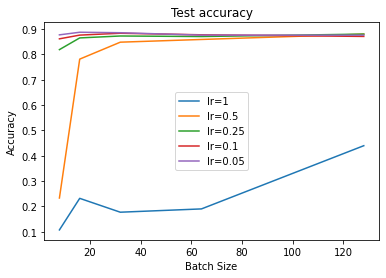

In [67]:
#plot the result
plt.plot([8,16,32,64,128], list(accuracy_lr_size[1].values()), label = "lr=1")
plt.plot([8,16,32,64,128], list(accuracy_lr_size[0.5].values()), label = "lr=0.5")
plt.plot([8,16,32,64,128], list(accuracy_lr_size[0.25].values()), label = "lr=0.25")
plt.plot([8,16,32,64,128], list(accuracy_lr_size[0.1].values()), label = "lr=0.1")
plt.plot([8,16,32,64,128], list(accuracy_lr_size[0.05].values()), label = "lr=0.05")
plt.title("Test accuracy")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the chart, optimal learning rate lies within 0.05-0.25. 

From the table, we see that larger batch size tends to go with higher learning rate to maximize accuracy. This is because for smaller batch size, the loss is more volatile and it is more suitable to use smaller learning rate for smaller batch size.
We will choose learning rate 0.05 and batch size 16 which has highest accuracy 88.76%.

### Tuning by regularization

To avoid over-fitting, there are techniques known as regularization, trying to make the model learn in a generalized way and not over-fit to training data. We have built two types of regularization: L1, L2, where L1 uses the sum of absolute weight as penality added to loss, while L2 uses the sum of squares of weights as penality. The rationale is to avoid some weight being too important  (and thus too much reliance on very few features or parameters and possibly overfitting). The extent of regularization can be adjusted multiplying the penality to a coefficient called lambda (which is alpha in our internal code). Let's tune by different extent of regularization.

In [62]:
lr=0.05
batch_size=16

L1={}
accuracy_L1={}
print('Test accuracy with L1')
for j in [0.1,0.05,0.01,0.005,0]:
    L1[j]=NN1(L=L1,alpha=j,lr=lr, batch_size=batch_size, )
    accuracy_L1[j]=L1[j].accuracy(L1[j].predict(X_test),y_test)
    print("L1 at "+str(j)+": "+"{:.2f}".format(accuracy_L1[j]*100)+"%")

L2={}
accuracy_L2={}
print('Test accuracy with L2')
for j in [0.1,0.05,0.01,0.005,0]:
    L2[j]=NN1(L=L2,alpha=j,lr=lr, batch_size=batch_size, )
    accuracy_L2[j]=L2[j].accuracy(L2[j].predict(X_test),y_test)
    print("L2 at "+str(j)+": "+"{:.2f}".format(accuracy_L2[j]*100)+"%")

Test accuracy with L1
average loss improvement is small: early stop
L1 at 0.1: 88.76%
average loss improvement is small: early stop
L1 at 0.05: 88.76%
average loss improvement is small: early stop
L1 at 0.01: 88.76%
average loss improvement is small: early stop
L1 at 0.005: 88.76%
average loss improvement is small: early stop
L1 at 0: 88.76%
Test accuracy with L2
average loss improvement is small: early stop
L2 at 0.1: 88.76%
average loss improvement is small: early stop
L2 at 0.05: 88.76%
average loss improvement is small: early stop
L2 at 0.01: 88.76%
average loss improvement is small: early stop
L2 at 0.005: 88.76%
average loss improvement is small: early stop
L2 at 0: 88.76%


The test accuracy remains the same with L1 and L2 for all levels. Note: we have used the same default random seed for fair comparison. This shows that our NN learnt is quite well for generalization and there is not much over-fitting.

### Tuning by stopping criteria

Stopping criteria is used for saving computation time and more importantly, also avoids over-fitting which may occur with execessive training. We design the NN to stop when there is no significant improvement (default threshold 2.5%) of loss compared with previous p epochs, where p is patience in our code. We also allow user to specifiy min and max number of epochs, and select whether to use training or validation loss for monitoring improvement. 

In [12]:
lr=0.05
batch_size=16

NN_patience={}
accuracy_p={}
print('Test accuracy with patience in stopping criteria')
for j in range(1,10):
    NN_patience[j]=NN1(lr=lr, batch_size=batch_size,v_fit=True)
    accuracy_p[j]=NN_patience[j].accuracy(NN_patience[j].predict(X_test),y_test)
    print("Patience at "+str(j)+": "+"{:.2f}".format(accuracy_p[j]*100)+"%")

Test accuracy with patience in stopping criteria
epoch 0 average loss: 0.487; train accy: 0.862; test accy: 0.848; test loss: 0.427
epoch 1 average loss: 0.370; train accy: 0.877; test accy: 0.859; test loss: 0.390
epoch 2 average loss: 0.335; train accy: 0.894; test accy: 0.872; test loss: 0.355
epoch 3 average loss: 0.311; train accy: 0.900; test accy: 0.874; test loss: 0.347
epoch 4 average loss: 0.291; train accy: 0.887; test accy: 0.862; test loss: 0.389
epoch 5 average loss: 0.276; train accy: 0.905; test accy: 0.876; test loss: 0.339
epoch 6 average loss: 0.263; train accy: 0.916; test accy: 0.887; test loss: 0.317
epoch 7 average loss: 0.251; train accy: 0.920; test accy: 0.887; test loss: 0.316
epoch 8 average loss: 0.241; train accy: 0.916; test accy: 0.882; test loss: 0.338
epoch 9 average loss: 0.231; train accy: 0.925; test accy: 0.889; test loss: 0.312
epoch 10 average loss: 0.222; train accy: 0.924; test accy: 0.885; test loss: 0.325
epoch 11 average loss: 0.214; train a

epoch 9 average loss: 0.231; train accy: 0.925; test accy: 0.889; test loss: 0.312
epoch 10 average loss: 0.222; train accy: 0.924; test accy: 0.885; test loss: 0.325
epoch 11 average loss: 0.214; train accy: 0.930; test accy: 0.888; test loss: 0.322
average loss improvement is small: early stop
Patience at 8: 88.76%
epoch 0 average loss: 0.487; train accy: 0.862; test accy: 0.848; test loss: 0.427
epoch 1 average loss: 0.370; train accy: 0.877; test accy: 0.859; test loss: 0.390
epoch 2 average loss: 0.335; train accy: 0.894; test accy: 0.872; test loss: 0.355
epoch 3 average loss: 0.311; train accy: 0.900; test accy: 0.874; test loss: 0.347
epoch 4 average loss: 0.291; train accy: 0.887; test accy: 0.862; test loss: 0.389
epoch 5 average loss: 0.276; train accy: 0.905; test accy: 0.876; test loss: 0.339
epoch 6 average loss: 0.263; train accy: 0.916; test accy: 0.887; test loss: 0.317
epoch 7 average loss: 0.251; train accy: 0.920; test accy: 0.887; test loss: 0.316
epoch 8 average l

Both results from tuning regularization and stopping criteria seems to suggest our model doesn't have much over-fitting. Let's plot the loss curve to double check.

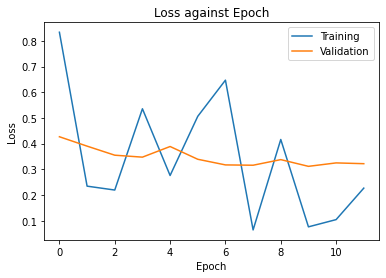

In [16]:
#plot loss curve
plt.plot(NN_patience[1].L_ar[:,-1], label = "Training")
plt.plot(NN_patience[1].L_valid[:,-1], label = "Validation")
plt.title("Loss against Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

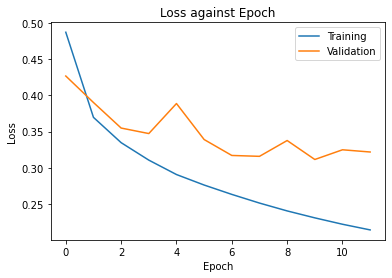

In [17]:
#plot loss curve
plt.plot(np.sum(NN_patience[1].L_ar, axis=1, keepdims=True)/NN_patience[1].num_batches, label = "Training")
plt.plot(NN_patience[1].L_valid[:,-1], label = "Validation")
plt.title("Loss against Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

From the chart, there is some over-fitting, though it is not serious enough to hurt testing result, it just remains flat for testing even when training loss keeps decreasing. Let's tune another stopping criteria - improvement threshold for shorter patience at 2.

In [23]:
lr=0.05
batch_size=16

NN_improve_threshold={}
accuracy_i={}
print('Test accuracy with improvement threshold in stopping criteria')
for j in [0.1, 0.05, 0.025, 0.01, 0.005]:
    NN_improve_threshold[j]=NN1(improve_threshold=j, patience=2, lr=lr, batch_size=batch_size,v_fit=True)
    accuracy_i[j]=NN_improve_threshold[j].accuracy(NN_improve_threshold[j].predict(X_test),y_test)
    print("Improvement threshold at "+str(j)+": "+"{:.2f}".format(accuracy_i[j]*100)+"%")

Test accuracy with improvement threshold in stopping criteria
epoch 0 average loss: 0.487; train accy: 0.862; test accy: 0.848; test loss: 0.427
epoch 1 average loss: 0.370; train accy: 0.877; test accy: 0.859; test loss: 0.390
epoch 2 average loss: 0.335; train accy: 0.894; test accy: 0.872; test loss: 0.355
epoch 3 average loss: 0.311; train accy: 0.900; test accy: 0.874; test loss: 0.347
epoch 4 average loss: 0.291; train accy: 0.887; test accy: 0.862; test loss: 0.389
average loss improvement is small: early stop
Improvement threshold at 0.1: 86.23%
epoch 0 average loss: 0.487; train accy: 0.862; test accy: 0.848; test loss: 0.427
epoch 1 average loss: 0.370; train accy: 0.877; test accy: 0.859; test loss: 0.390
epoch 2 average loss: 0.335; train accy: 0.894; test accy: 0.872; test loss: 0.355
epoch 3 average loss: 0.311; train accy: 0.900; test accy: 0.874; test loss: 0.347
epoch 4 average loss: 0.291; train accy: 0.887; test accy: 0.862; test loss: 0.389
average loss improvement 

As the results remain the same, we will not change default improvement threshold.

Recall that the above best combination of hyper paramerer gives us 88.76% accuracy. Out of curiosity , let's see if the same hyper parameters work well for the 2-hidden-layer NN which got accuracy 88.4% previously.


In [21]:
model2=NNs(lr=0.05, batch_size=16, n1=2048, n2=256, v_fit=True)
model2.accuracy(model2.predict(X_test),y_test)

epoch 0 average loss: 0.475; train accy: 0.867; test accy: 0.853; test loss: 0.409
epoch 1 average loss: 0.351; train accy: 0.872; test accy: 0.853; test loss: 0.402
epoch 2 average loss: 0.313; train accy: 0.890; test accy: 0.861; test loss: 0.366
epoch 3 average loss: 0.286; train accy: 0.900; test accy: 0.867; test loss: 0.351
epoch 4 average loss: 0.265; train accy: 0.894; test accy: 0.863; test loss: 0.378
epoch 5 average loss: 0.248; train accy: 0.917; test accy: 0.882; test loss: 0.330
epoch 6 average loss: 0.234; train accy: 0.925; test accy: 0.886; test loss: 0.318
epoch 7 average loss: 0.222; train accy: 0.927; test accy: 0.885; test loss: 0.320
epoch 8 average loss: 0.211; train accy: 0.935; test accy: 0.890; test loss: 0.312
epoch 9 average loss: 0.198; train accy: 0.932; test accy: 0.889; test loss: 0.327
epoch 10 average loss: 0.189; train accy: 0.943; test accy: 0.895; test loss: 0.310
epoch 11 average loss: 0.182; train accy: 0.929; test accy: 0.884; test loss: 0.358
av

0.8837

### Conclusion
Hence, we conclude that the optimal neural network structure is 2-layer(1024/10) and optimal parameters are:
learning rate 0.05
batch size 16
no regularization L1 or L2
ReLu activation for hidden layers
Softmax activation for output layer

The test accuracy is 88.76%.
